# Physics 5300 Final Project
Katherine Indyk, 04/18/2025
# Modelling the 3 Body Problem in 2D

This system involves three bodies with mass $m_1$, $m_2$, $m_3$

These masses exert a gravitational force on each other and are free to move in a 2D plane of $x$ and $y$. Each mass has their own coordinate pair to describe their location: $x_i$ and $y_i$.

Assumptions and symmetries:
1. All three masses are approximately the same order of magnitude (ex. no small/large mass limits are being used)
2. All masses are moving only in a 2D coordinate system

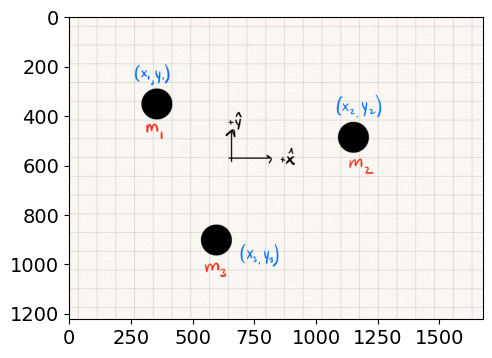

In [12]:
import matplotlib.pyplot as plt
from PIL import Image
 
img = Image.open("IMG_1400.jpeg")
plotimg = plt.imshow(img)

### Kinetic energy and potential energy of the system:

$\begin{align}
  \mathcal{T} = \frac12 m_1 (\dot x_1^2 + \dot y_1^2 ) + \frac12 m_2 (\dot x_2^2 + \dot y_2^2 ) + \frac12 m_3 (\dot x_3^2 + \dot y_3^2 )
\end{align}$

$\begin{align}
  \mathcal{U} = \frac{-G m_1 m_3}{\sqrt{(x_3 - x_1)^2 + ( y_3 - y_1 )^2}} + \frac{-G m_2 m_3}{\sqrt{(x_3 - x_2)^2 + ( y_3 - y_2 )^2}} + \frac{-G m_1 m_2}{\sqrt{(x_2 - x_1)^2 + ( y_2 - y_1 )^2}}
\end{align}$

$\begin{align}
   \frac{d}{d t} \frac{\partial\mathcal{L}}{\partial \dot q_i} = \frac{\partial\mathcal{L}}{\partial  q_i}
   \;
\end{align}$

### Euler-Lagrange equations for the six generalized coordinates of this problem: $x_1$, $x_2$, $x_3$, $y_1$, $y_2$, $y_3$.


$\begin{align}
    \ddot x_1 = \frac{G m_3 (x_3 - x_1)}{(r_{13})^{3}} + \frac{G m_2 (x_2 - x_1)}{(r_{12})^{3}}
\end{align}$

$\begin{align}
    \ddot x_2 = \frac{G m_3 (x_3 - x_2)}{(r_{23})^{3}} - \frac{G m_1 (x_2 - x_1)}{(r_{12})^{3}}
\end{align}$

$\begin{align}
    \ddot x_3 = \frac{- G m_1 (x_3 - x_1)}{(r_{13})^{3}} - \frac{G m_2 (x_3 - x_2)}{(r_{23})^{3}}
\end{align}$

$\begin{align}
    \ddot y_1 = \frac{G m_3 (y_3 - y_1)}{(r_{13})^{3}} + \frac{G m_2 (y_2 - y_1)}{(r_{12})^{3}}
\end{align}$

$\begin{align}
    \ddot y_2 = \frac{G m_3 (y_3 - y_2)}{(r_{23})^{3}} - \frac{G m_1 (y_2 - y_1)}{(r_{12})^{3}}
\end{align}$

$\begin{align}
    \ddot y_3 = \frac{- G m_1 (y_3 - y_1)}{(r_{13})^{3}} - \frac{G m_2 (y_3 - y_2)}{(r_{23})^{3}}
\end{align}$

Where:

$\begin{align}
    r_{12} = \sqrt{(x_2 - x_1)^2 + ( y_2 - y_1 )^2}
\end{align}$

$\begin{align}
    r_{13} = \sqrt{(x_3 - x_1)^2 + ( y_3 - y_1 )^2}
\end{align}$

$\begin{align}
    r_{23} = \sqrt{(x_3 - x_2)^2 + ( y_3 - y_2 )^2}
\end{align}$


## Import libraries, set up my Three Body Problem Class using the Lagrangian

In [13]:
%matplotlib inline

In [14]:
import numpy as np
import matplotlib  
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint, solve_ivp
# import PyQt6
# import manim
# from manim import *
# matplotlib.use('TkAgg')

In [15]:
plt.rcParams['figure.dpi'] = 100. 
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [16]:
class Lagrangianbodyproblem():
    """
    Implements the parameters and Lagrange's equations for 
     a 3 body problem with gravitational forces. 
     
    Parameters
    ----------
    m1 : float
        mass of body 1
    m2 : float
        mass of body 2
    m3 : float
        mass of body 3
    G : float
        gravitational constant

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, m1=1., m2=1., m3=1., G=1.
                ):
        self.m1 = m1
        self.m2 = m2
        self.m3 = m3
        self.G = G
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 12-component vector with 
            y[0] = x1(t) 
            y[1] = x2(t)
            y[2] = x3(t)
            y[3] = y1(t)
            y[4] = y2(t)
            y[5] = y3(t)
            y[6] = dx1/dt
            y[7] = dx2/dt
            y[8] = dx3/dt
            y[9] = dy1/dt
            y[10] = dy2/dt
            y[11] = dy3/dt
            
        Returns
        -------
        
        """
        return [y[6], y[7], y[8], y[9], y[10], y[11], 
                self.m3 * self.G * (y[2] - y[0]) / ((y[2] - y[0])**2 + (y[5] - y[3])**2)**(3/2) + 
                self.m2 * self.G * (y[1] - y[0]) / ((y[1] - y[0])**2 + (y[4] - y[3])**2)**(3/2),
                
                self.m3 * self.G * (y[2] - y[1]) / ((y[2] - y[1])**2 + (y[5] - y[4])**2)**(3/2) +
                self.m1 * self.G * (y[0] - y[1]) / ((y[0] - y[1])**2 + (y[3] - y[4])**2)**(3/2),

                self.m1 * self.G * (y[0] - y[2]) / ((y[0] - y[2])**2 + (y[3] - y[5])**2)**(3/2) +
                self.m2 * self.G * (y[1] - y[2]) / ((y[1] - y[2])**2 + (y[4] - y[5])**2)**(3/2),

                self.m3 * self.G * (y[5] - y[3]) / ((y[2] - y[0])**2 + (y[5] - y[3])**2)**(3/2) +
                self.m2 * self.G * (y[4] - y[3]) / ((y[1] - y[0])**2 + (y[4] - y[3])**2)**(3/2),

                self.m3 * self.G * (y[5] - y[4]) / ((y[2] - y[1])**2 + (y[5] - y[4])**2)**(3/2) +
                self.m1 * self.G * (y[3] - y[4]) / ((y[0] - y[1])**2 + (y[3] - y[4])**2)**(3/2),

                self.m2 * self.G * (y[4] - y[5]) / ((y[1] - y[2])**2 + (y[4] - y[5])**2)**(3/2) +
                self.m1 * self.G * (y[3] - y[5]) / ((y[0] - y[2])**2 + (y[3] - y[5])**2)**(3/2)
                ]
    
    def solve_ode(self, t_pts, x1_0, x2_0, x3_0, y1_0, y2_0, y3_0, x1dot_0, x2dot_0, x3dot_0, y1dot_0, y2dot_0, y3dot_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [x1_0, x2_0, x3_0, y1_0, y2_0, y3_0, x1dot_0, x2dot_0, x3dot_0, y1dot_0, y2dot_0, y3dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        x1, x2, x3, y1, y2, y3, x1_dot, x2_dot, x3_dot, y1_dot, y2_dot, y3_dot = solution.y

        return x1, x2, x3, y1, y2, y3, x1_dot, x2_dot, x3_dot, y1_dot, y2_dot, y3_dot

In [17]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index


def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])
    ax.grid()
    return ax, line

In [18]:
# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 30.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  
start, stop = start_stop_indices(t_pts, t_start, t_end)
G = 1.
m1=1.
m2=1.
m3=1.

# Start a 3 body problem
p1 = Lagrangianbodyproblem(m1=m1, m2=m2, m3=m3, G=G)

## Applying the Lagrangian class (with solve_ivp) with specific initial conditions
## Then, plotting the solutions

 - state space plots for all 6 variables and their time derivatives
 - coordinate space plot to compare position of three bodies over time




0 30000


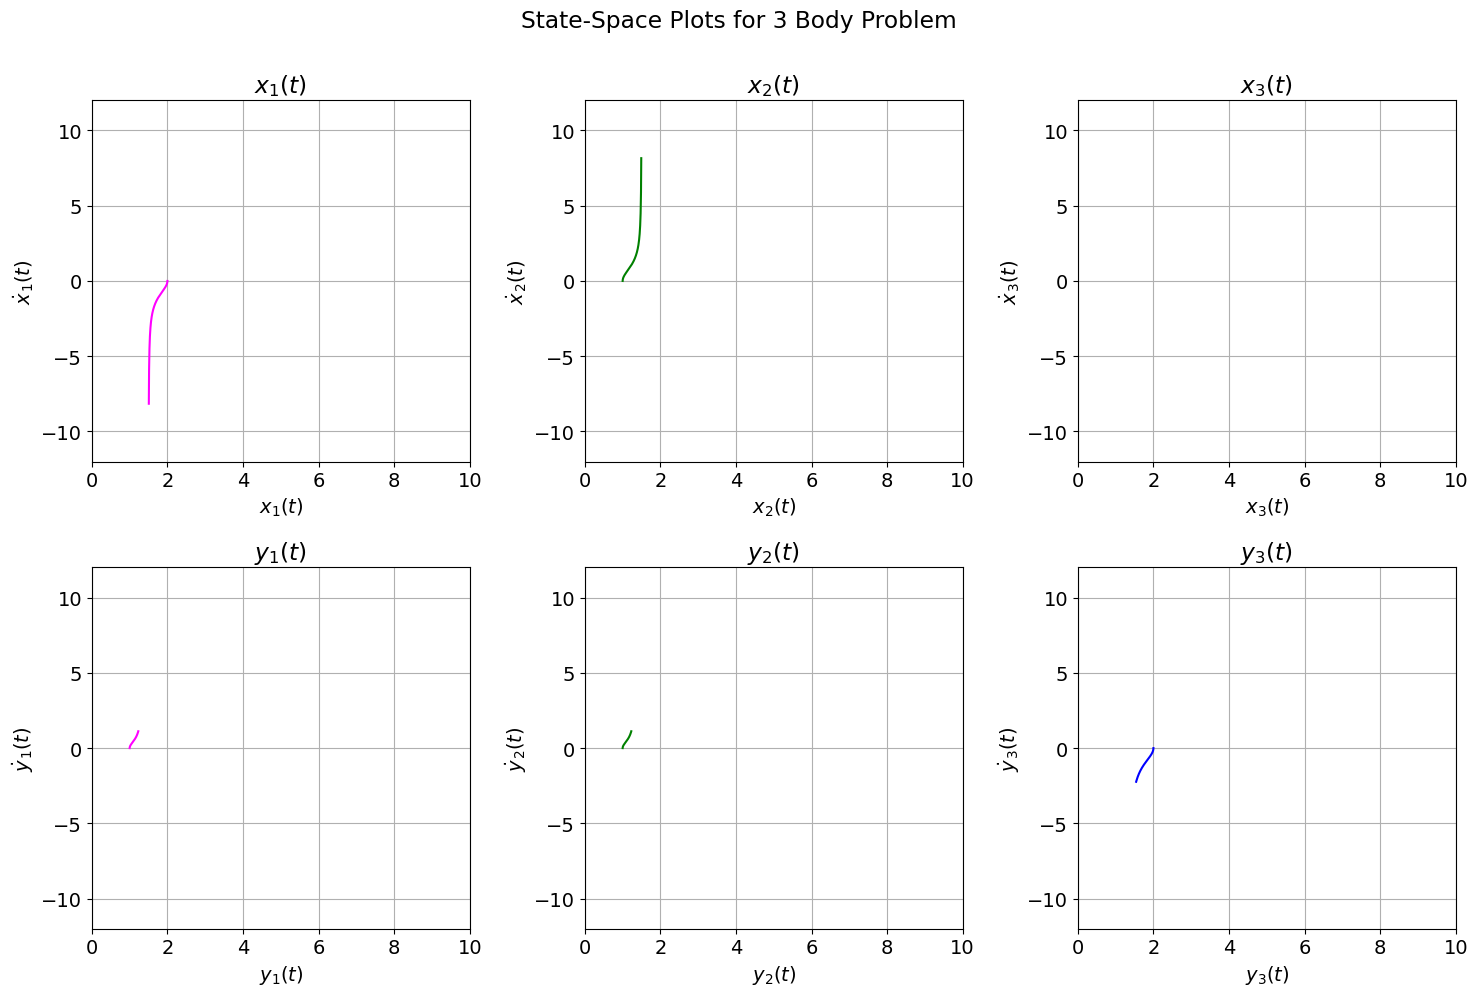

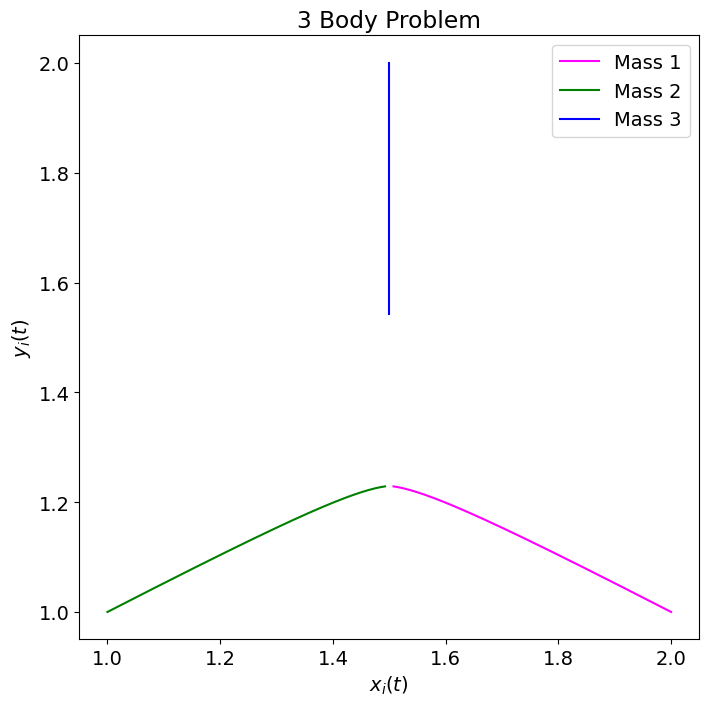

In [21]:
# both plots: same initial conditions
x1_0, y1_0 = 2., 1.   # initial position of body 1
x2_0, y2_0 = 1., 1.   # initial position of body 2
x3_0, y3_0 = 1.5, 2   # initial position of body 3
x1dot_0, y1dot_0 = 0., 0.   # initial velocity of body 1
x2dot_0, y2dot_0 = 0., 0.   # initial velocity of body 2
x3dot_0, y3dot_0 = 0., 0.   # initial velocity of body 3


x1, x2, x3, y1, y2, y3, x1_dot, x2_dot, x3_dot, y1_dot, y2_dot, y3_dot = p1.solve_ode(t_pts, x1_0, x2_0, x3_0, 
                                                                                      y1_0, y2_0, y3_0, x1dot_0, x2dot_0, x3dot_0, 
                                                                                      y1dot_0, y2dot_0, y3dot_0,)
   
# print(x1)
# start the plot!
fig = plt.figure(figsize=(15,10))
xlim_min = 0.
xlim_max = 10.
ylim_min = -12.
ylim_max = 12.
overall_title = 'State-Space Plots for 3 Body Problem' 
fig.suptitle(overall_title, va='baseline')
    
# Plot 1: State Space for X1
ax_a = fig.add_subplot(2,3,1)                  
# print(start, stop) 
plot_y_vs_x(x1[start : stop], x1_dot[start : stop], 
            axis_labels=(r'$x_1(t)$', r'$\dot x_1(t)$'), 
            color='magenta',
            label=None, 
            title=r'$x_1(t)$', 
            ax=ax_a) 
ax_a.set_ylim(ylim_min, ylim_max)
ax_a.set_xlim(xlim_min, xlim_max)       
# Plot 1: State Space for X2
ax_b = fig.add_subplot(2,3,2)                  
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x2[start : stop], x2_dot[start : stop], 
            axis_labels=(r'$x_2(t)$', r'$\dot x_2(t)$'), 
            color='green',
            label=None, 
            title=r'$x_2(t)$', 
            ax=ax_b)    
ax_b.set_ylim(ylim_min, ylim_max)
ax_b.set_xlim(xlim_min, xlim_max)
# Plot 1: State Space for X3
ax_c = fig.add_subplot(2,3,3)                  
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x3[start : stop], x3_dot[start : stop], 
            axis_labels=(r'$x_3(t)$', r'$\dot x_3(t)$'), 
            color='blue',
            label=None, 
            title=r'$x_3(t)$', 
            ax=ax_c)    
ax_c.set_ylim(ylim_min, ylim_max)
ax_c.set_xlim(xlim_min, xlim_max)
# Plot 1: State Space for Y1
ax_a = fig.add_subplot(2,3,4)                  
start, stop = start_stop_indices(t_pts, t_start, t_end)   
print(start, stop) 
plot_y_vs_x(y1[start : stop], y1_dot[start : stop], 
            axis_labels=(r'$y_1(t)$', r'$\dot y_1(t)$'), 
            color='magenta',
            label=None, 
            title=r'$y_1(t)$', 
            ax=ax_a)    
ax_a.set_ylim(ylim_min, ylim_max)
ax_a.set_xlim(xlim_min, xlim_max)                             
# Plot 1: State Space for Y2
ax_b = fig.add_subplot(2,3,5)                  
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(y2[start : stop], y2_dot[start : stop], 
            axis_labels=(r'$y_2(t)$', r'$\dot y_2(t)$'), 
            color='green',
            label=None, 
            title=r'$y_2(t)$', 
            ax=ax_b)    
ax_b.set_ylim(ylim_min, ylim_max)
ax_b.set_xlim(xlim_min, xlim_max)
# Plot 1: State Space for Y3
ax_c = fig.add_subplot(2,3,6)                  
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(y3[start : stop], y3_dot[start : stop], 
            axis_labels=(r'$y_3(t)$', r'$\dot y_3(t)$'), 
            color='blue',
            label=None, 
            title=r'$y_3(t)$', 
            ax=ax_c)    
ax_c.set_ylim(ylim_min, ylim_max)
ax_c.set_xlim(xlim_min, xlim_max)

fig.tight_layout()
fig.show()
fig.savefig('3BodyProblem_statespace.png', bbox_inches='tight')  

fig = plt.figure(figsize=(8,8))
plt.plot(x1[start : stop], y1[start : stop], label='Mass 1', color='magenta')
plt.plot(x2[start : stop], y2[start : stop],label ='Mass 2', color='green')
plt.plot(x3[start : stop], y3[start : stop], label='Mass 3', color='blue')
plt.title('3 Body Problem')
plt.xlabel('$x_i(t)$')
plt.ylabel('$y_i(t)$')
plt.legend()


## Creating an Animation using Matplotlib

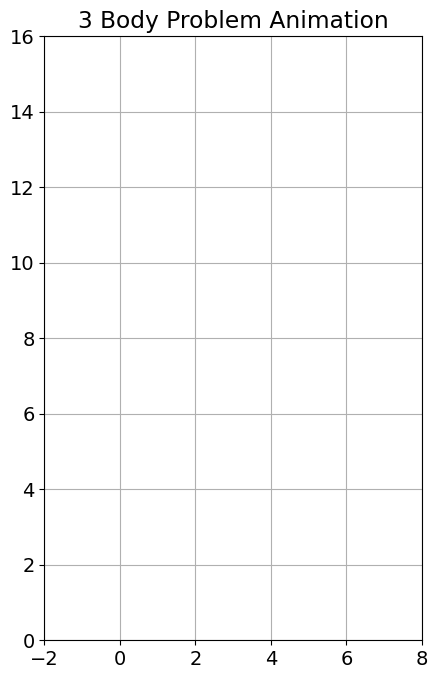

In [22]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title('3 Body Problem Animation')
ax.set_xlim(-2., 8)
ax.set_ylim(0., 16)
ax.set_aspect('equal')
ax.grid(True)

# Initialize points and trail lines
point1, = ax.plot([], [], 'mo')  # Red point
point2, = ax.plot([], [], 'go')  # Green point
point3, = ax.plot([], [], 'bo')  # Blue point
trail1, = ax.plot([], [], 'm-', linewidth=1)
trail2, = ax.plot([], [], 'g-', linewidth=1)  # Green trail
trail3, = ax.plot([], [], 'b-', linewidth=1)  # Blue trail

# Initialize lists for trails (coordinates history)
trail1_x, trail1_y = [], []
trail2_x, trail2_y = [], []
trail3_x, trail3_y = [], []

# Initialization function
def init():
    point1.set_data([], [])
    trail1.set_data([], [])
    point2.set_data([], [])
    trail2.set_data([], [])
    point3.set_data([], [])
    trail3.set_data([], [])
    return point1, trail1, point2, trail2, point3, trail3

# Update function for animation
def update(frame):
    # Ensure points are sequences even for a single point
    point1.set_data([x1[frame]], [y1[frame]])
    point2.set_data([x2[frame]], [y2[frame]])
    point3.set_data([x3[frame]], [y3[frame]])

    # Update trail data by appending new positions
    trail1_x.append(x1[frame])
    trail1_y.append(y1[frame])
    trail2_x.append(x2[frame])
    trail2_y.append(y2[frame])
    trail3_x.append(x3[frame])
    trail3_y.append(y3[frame])

    # Update trails with accumulated coordinates
    trail1.set_data(trail1_x, trail1_y)
    trail2.set_data(trail2_x, trail2_y)
    trail3.set_data(trail3_x, trail3_y)

    return point1, trail1, point2, trail2, point3, trail3

# Create the animation
# frames is what is iterating over, so it should be the length of the data. this is my length of t_pts from before
# frames=len(t_pts[start:stop])
ani = animation.FuncAnimation(
    fig, update, frames=300,
    init_func=init, interval=1, repeat=False
)
plt.show()

## Conclusions

 - This system exhibits chaotic behavior
 - There are scenarios that are not chaotic, but they require very specific initial conditions and parameters
 - The Hamiltonian is easy to compute, but doesn't provide a clear advantage in this situation
 - This system in 3D would be relatively easy to produce, but I anticipate that this would be much more sensitive to changes in parameters to cause chaotic behavior